In [ ]:
!pip install qiskit qiskit-aer
!pip install qiskit[visualization]

In [19]:
!pip install --upgrade pylatexenc

In [ ]:
# 　一回だけ，ノートブックのカーネルを再起動する　（１回限り）
import os
os.kill(os.getpid(), 9)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


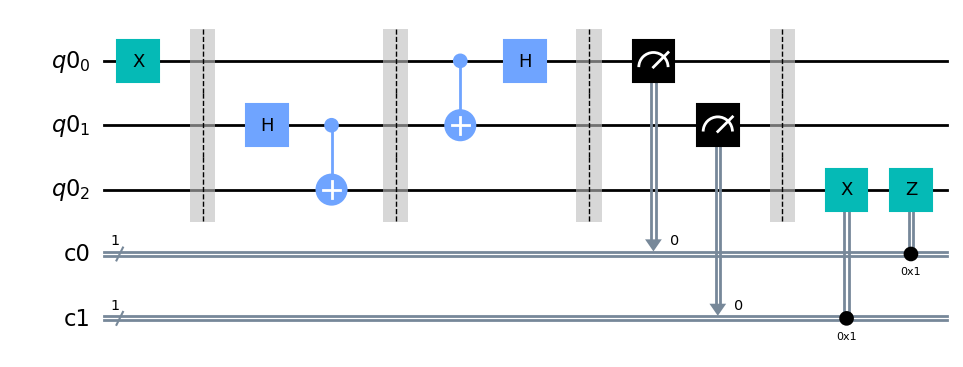

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere

# 3量子ビット
qr = QuantumRegister (3)
# 2古典ビット
crz = ClassicalRegister (1)
crx = ClassicalRegister (1)
qc = QuantumCircuit (qr, crz, crx)

# アリスが送りたい量子ビットを初期化 （|1>とする）
qc.x (0)        # |0> ビット反転
qc.barrier ()

# アリスとボブが共有するベル状態ペア
# (量子エンタングルメント＝量子もつれ)
qc.h (1)        #  アダマールゲート:   量子重ね合わせ
qc.cx (1, 2)    #  CNOT ：　制御NOTE
qc.barrier ()

# アリスが自分の量子ビットに操作を施す
qc.cx (0, 1)     #  CNOT ：　制御NOTE
qc.h (0)         #  アダマールゲート:   量子重ね合わせ
qc.barrier ()

# アリスが自分の量子ビットを測定
# 結果を古典レジスタに送る
qc.measure (0, 0)
qc.measure (1, 1)
qc.barrier ()

# ボブが古典レジスタの値に応じて自分の量子ビットを操作 (if文)
qc.x (2).c_if (crx, 1)  # アリスからの古典通信が01 → Xゲートでビット反転
qc.z (2).c_if (crz, 1)  # アリスからの古典通信が10 → Zゲートで位相反転
# アリスからの古典通信が11 → ZゲートZゲート（＝＝Yゲート）でビット位相反転
# アリスからの古典通信が00 → 何もしなくて，そのままのボブの量子ビットでよい

qc.draw (output='mpl')

In [2]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
statevector = result.get_statevector()


<ipython-input-2-787480110c06>:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend = Aer.get_backend('statevector_simulator')
<ipython-input-2-787480110c06>:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(qc, backend).result()


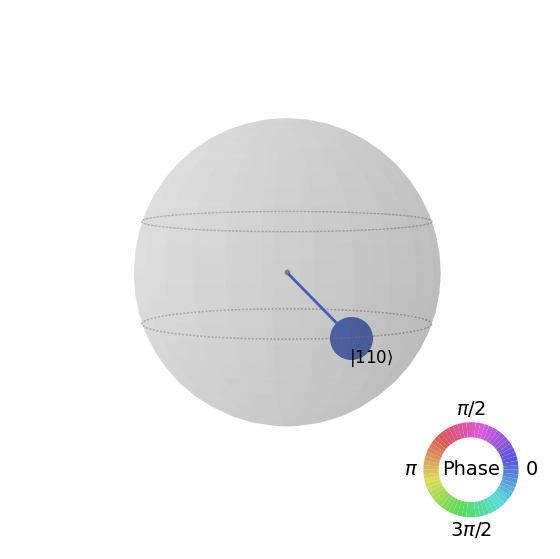

In [4]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere

plot_bloch_multivector(statevector)
plot_state_qsphere(statevector)


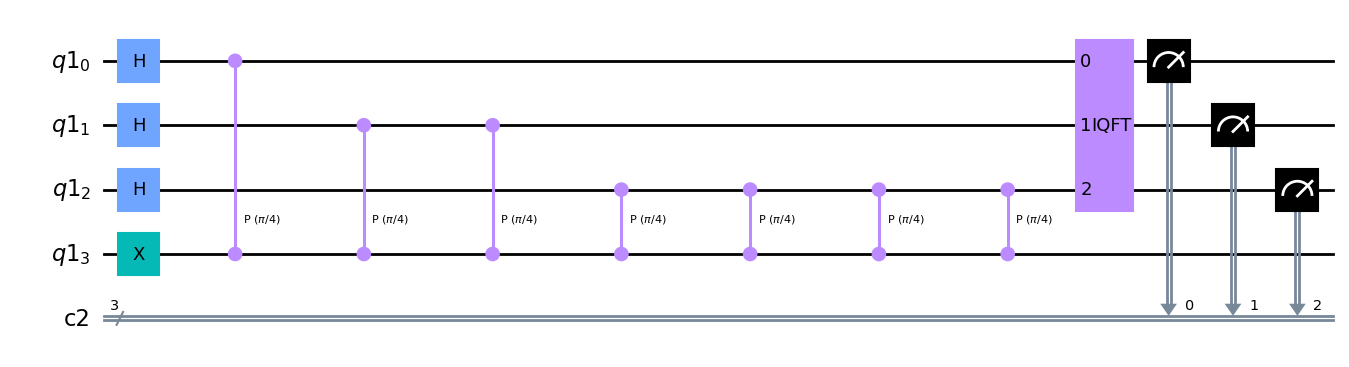

In [ ]:
import numpy as np
from qiskit.visualization import plot_histogram

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.circuit.library import QFT

n = 3 # 位相推定の精度を決める量子ビットの数
t = 1 # ユニタリ行列の作用する量子ビットの数
qr = QuantumRegister(n + t) # 量子レジスタ
cr = ClassicalRegister(n) # 古典レジスタ
qc = QuantumCircuit(qr, cr) # 量子回路

for i in range(n):
    qc.h(i)

# ユニタリ行列の固有ベクトルを初期化する（ここでは|1>とする）
qc.x(n)

# 制御ユニタリ行列を作用させる（ここでは制御Zゲートとする）
repetitions = 1
for counting_qubit in range(n):
    for i in range(repetitions):
        qc.cp(2 * np.pi / 2**n, counting_qubit, n)
    repetitions *= 2

# 逆量子フーリエ変換を行う
qc.append(QFT(n, inverse=True), qr[:n])

# 位相推定に使った量子ビットを測定する
qc.measure(qr[:n], cr)

# 量子ゲート回路を表示する
qc.draw(output='mpl')

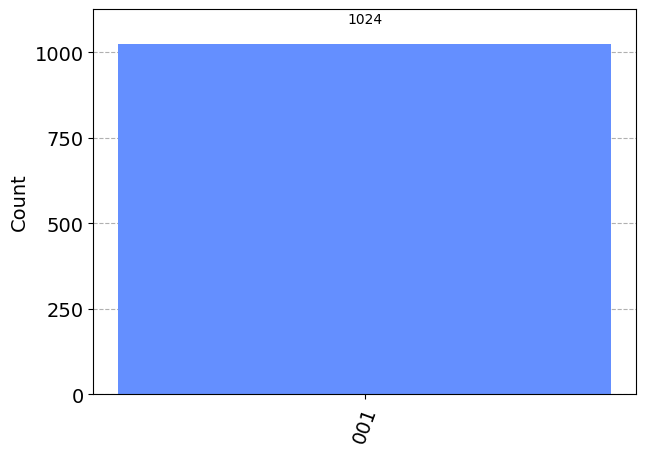

In [ ]:
backend = Aer.get_backend('qasm_simulator')

job = execute(qc, backend, shots=1024)

result = job.result()

counts = result.get_counts(qc)
plot_histogram(counts)

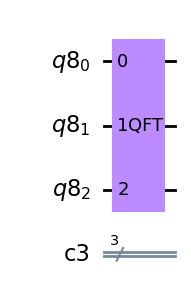

In [ ]:

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.circuit.library import QFT

n = 3 # 量子ビットの数
qr = QuantumRegister(n) # 量子レジスタ
cr = ClassicalRegister(n) # 古典レジスタ
qc = QuantumCircuit(qr, cr) # 量子回路

# QFTの量子ゲート回路図を作成
qft = QFT(n, inverse=False) # QFTの関数を呼び出す
qc.compose(qft, inplace=True) # QFTの回路を量子回路に組み込む
qc.draw(output='mpl') # 量子ゲート回路図を表示する


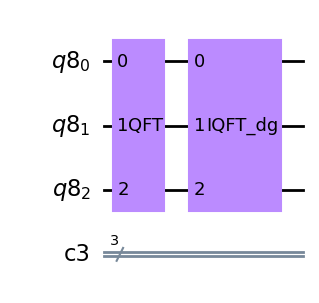

In [ ]:
# IQFTの量子ゲート回路図を作成
iqft = QFT(n, inverse=True) # IQFTの関数を呼び出す
qc.compose(iqft, inplace=True) # IQFTの回路を量子回路に組み込む
qc.draw(output='mpl') # 量子ゲート回路図を表示する
